In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [5]:
if os.path.isfile("mba-report-18-data-release-august-2022.csv"):
    filepath = "mba-report-18-data-release-august-2022.csv"
    print("loading from file")
else:
    filepath = "https://data.gov.au/data/dataset/measuring-broadband-australia-report-18-dataset-release/resource/7a9226d3-23c6-466d-a550-a316969c0ec1"
    print("loading from the internet")

internet_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [92]:
internet_data.shape

(1443, 29)

In [8]:
internet_data.head(8)

,unit_id,connection_type,technology,tier,rsp,state_or_territory,geography,is_this_service_impaired,is_this_service_underperforming,gateway_mac,...,Busy hour trimmed mean upload speed,Busy hour minimum upload speed,Busy hour maximum upload speed,All hour trimmed mean latency,All hour minimum latency,All hour maximum latency,Busy hour trimmed mean latency,Busy hour minimum latency,Busy hour maximum latency,Average daily outages
0,2975233,NBN,Fibre to the Node,50/20 Mbps,TPG,NSW,Urban,True,False,C471xxxxxx,...,8.52,7.73,9.51,6.57,5.96,8.07,6.64,6.05,8.07,0.03
1,1029377,NBN,Fibre to the Premises,50/20 Mbps,TPG,TAS,Urban,False,False,B4B0xxxxxx,...,17.84,16.34,18.86,12.51,12.47,12.58,12.54,12.52,12.58,NaN
2,55971333,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Superloop,NSW,Urban,False,False,F02Fxxxxxx,...,18.87,18.31,19.01,9.26,7.72,39.27,11.10,8.25,39.27,0.23
3,4991237,NBN,Fibre to the Curb,100/40 Mbps,Optus,NSW,Urban,False,False,3C37xxxxxx,...,37.55,37.22,38.01,7.43,6.42,70.93,8.66,6.48,70.93,0.00
4,45564677,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Telstra,VIC,Urban,False,False,20B0xxxxxx,...,18.22,17.88,18.37,9.14,8.59,10.07,9.28,8.84,9.96,0.76
5,1028872,NBN,Hybrid Fibre Coaxial,50/20 Mbps,TPG,NSW,Urban,False,False,1C3Bxxxxxx,...,4.70,4.40,4.80,11.88,9.91,17.85,12.10,10.16,13.94,0.00
6,1029385,NBN,Fibre to the Node,50/20 Mbps,TPG,NSW,Major Rural,False,False,A4CAxxxxxx,...,18.14,17.94,18.27,6.05,5.96,6.29,6.08,6.01,6.27,0.14
7,49336329,NBN,Fibre to the Premises,100/40 Mbps,TPG,NSW,Urban,False,False,881Fxxxxxx,...,37.64,37.56,37.68,3.90,3.54,5.26,4.02,3.73,5.26,0.00


In [13]:
internet_data.columns

Index(['unit_id', 'connection_type', 'technology', 'tier', 'rsp',
       'state_or_territory', 'geography', 'is_this_service_impaired',
       'is_this_service_underperforming', 'gateway_mac',
       'All hour trimmed mean download speed',
       'All hour minimum download speed', 'All hour maximum download speed',
       'Busy hour trimmed mean download speed',
       'Busy hour minimum download speed', 'Busy hour maximum download speed',
       'All hour trimmed mean upload speed', 'All hour minimum upload speed',
       'All hour maximum upload speed', 'Busy hour trimmed mean upload speed',
       'Busy hour minimum upload speed', 'Busy hour maximum upload speed',
       'All hour trimmed mean latency', 'All hour minimum latency',
       'All hour maximum latency', 'Busy hour trimmed mean latency',
       'Busy hour minimum latency', 'Busy hour maximum latency',
       'Average daily outages'],
      dtype='object')

In [17]:
row_one = internet_data.iloc[0]
row_one

unit_id                                            2975233
connection_type                                        NBN
technology                               Fibre to the Node
tier                                            50/20 Mbps
rsp                                                    TPG
state_or_territory                                     NSW
geography                                            Urban
is_this_service_impaired                              True
is_this_service_underperforming                      False
gateway_mac                                     C471xxxxxx
All hour trimmed mean download speed                 43.78
All hour minimum download speed                      39.65
All hour maximum download speed                      45.36
Busy hour trimmed mean download speed                43.87
Busy hour minimum download speed                     40.17
Busy hour maximum download speed                     45.23
All hour trimmed mean upload speed                    8.

In [45]:
internet_data["geography"].value_counts()

Urban          1205
Major Rural      83
Remote           60
Minor Rural      55
Name: geography, dtype: int64

In [93]:
internet_data.rsp.unique()

array(['TPG', 'Superloop', 'Optus', 'Telstra', 'Aussie Broadband',
       'Dodo & iPrimus', 'MyRepublic', nan, 'Other RSPs', 'iiNet',
       'Exetel', 'Vodafone', 'Launtel'], dtype=object)

In [96]:
internet_data.rsp.value_counts()

Aussie Broadband    196
Telstra             182
TPG                 153
iiNet               142
Optus               122
Dodo & iPrimus       88
Exetel               71
Superloop            69
Launtel              53
MyRepublic           50
Vodafone             47
Other RSPs           36
Name: rsp, dtype: int64

Text(0.5, 1.0, 'Maximum latency at all hours in August')

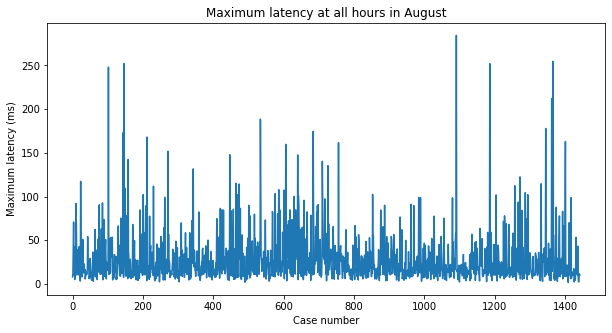

In [97]:
internet_data["All hour maximum latency"].plot()
plt.xlabel("Case number")
plt.ylabel("Maximum latency (ms)")
plt.title("Maximum latency at all hours in August")

Text(0, 0.5, 'Maximum latency (ms)')

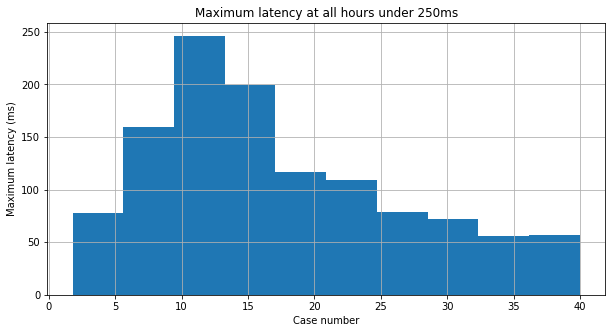

In [7]:
internet_data["All hour maximum latency"][internet_data["All hour maximum latency"] < 40].hist()
plt.title("Maximum latency at all hours under 250ms")
plt.xlabel("Case number")
plt.ylabel("Maximum latency (ms)")

In [100]:
internet_data["Average daily outages"].value_counts()

0.00    424
0.03    220
0.06    150
0.10    105
0.13     73
       ... 
1.90      1
5.23      1
2.81      1
6.53      1
1.38      1
Name: Average daily outages, Length: 134, dtype: int64

Text(0.5, 0, 'Case number')

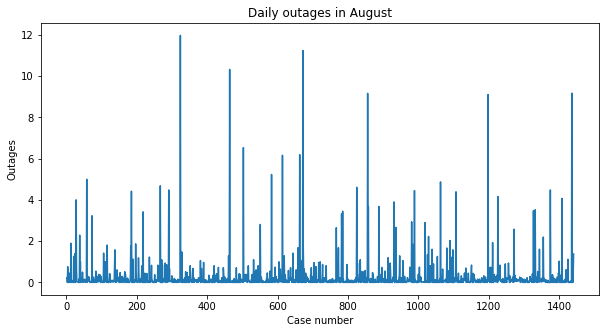

In [10]:
internet_data["Average daily outages"].plot()
plt.title("Daily outages in August")
plt.ylabel("Outages")
plt.xlabel("Case number")

In [120]:
internet_data["Average daily outages"][internet_data["Average daily outages"] > 10].head(10)

324    11.97
464    10.32
672    11.24
Name: Average daily outages, dtype: float64

In [68]:
row_one = internet_data.iloc[324]
row_one

unit_id                                            5071733
connection_type                                        NBN
technology                               Fibre to the Curb
tier                                           100/20 Mbps
rsp                                       Aussie Broadband
state_or_territory                                     NSW
geography                                            Urban
is_this_service_impaired                             False
is_this_service_underperforming                      False
gateway_mac                                     F8CAxxxxxx
All hour trimmed mean download speed                 67.14
All hour minimum download speed                       14.2
All hour maximum download speed                     102.11
Busy hour trimmed mean download speed                 68.4
Busy hour minimum download speed                      14.2
Busy hour maximum download speed                    102.11
All hour trimmed mean upload speed                   18.

In [69]:
row_one = internet_data.iloc[464]
row_one

unit_id                                            2211117
connection_type                                        NBN
technology                               Fibre to the Node
tier                                             12/1 Mbps
rsp                                         Dodo & iPrimus
state_or_territory                                     NSW
geography                                      Major Rural
is_this_service_impaired                             False
is_this_service_underperforming                      False
gateway_mac                                     F823xxxxxx
All hour trimmed mean download speed                 12.74
All hour minimum download speed                       9.66
All hour maximum download speed                      12.85
Busy hour trimmed mean download speed                12.76
Busy hour minimum download speed                     12.72
Busy hour maximum download speed                     12.78
All hour trimmed mean upload speed                    0.

In [ ]:
## determine which isp is fastest

In [85]:
internet_data.rsp[internet_data.rsp == "Aussie Broadband"].value_counts()

Aussie Broadband    196
Name: rsp, dtype: int64

<AxesSubplot:>

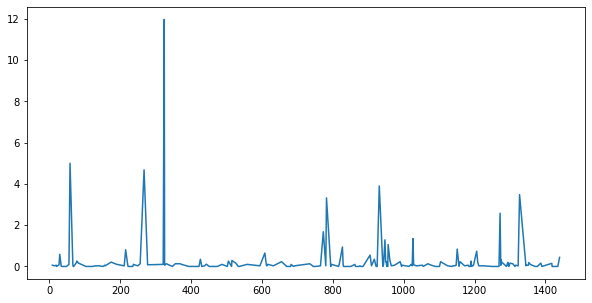

In [103]:
ado = internet_data["Average daily outages"]
ado[internet_data.rsp == "Aussie Broadband"].plot()


<AxesSubplot:>

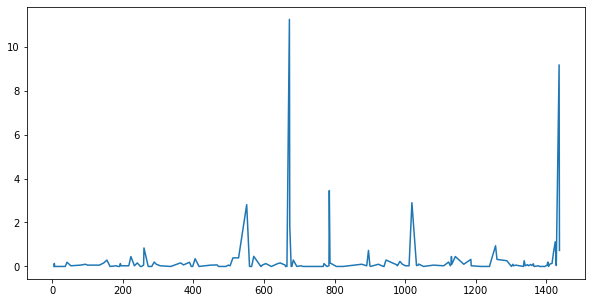

In [134]:
ado = internet_data["Average daily outages"]
ado[internet_data.rsp == "TPG"].plot()

In [144]:
internet_data.head()

,unit_id,connection_type,technology,tier,rsp,state_or_territory,geography,is_this_service_impaired,is_this_service_underperforming,gateway_mac,...,Busy hour trimmed mean upload speed,Busy hour minimum upload speed,Busy hour maximum upload speed,All hour trimmed mean latency,All hour minimum latency,All hour maximum latency,Busy hour trimmed mean latency,Busy hour minimum latency,Busy hour maximum latency,Average daily outages
0,2975233,NBN,Fibre to the Node,50/20 Mbps,TPG,NSW,Urban,True,False,C471xxxxxx,...,8.52,7.73,9.51,6.57,5.96,8.07,6.64,6.05,8.07,0.03
1,1029377,NBN,Fibre to the Premises,50/20 Mbps,TPG,TAS,Urban,False,False,B4B0xxxxxx,...,17.84,16.34,18.86,12.51,12.47,12.58,12.54,12.52,12.58,NaN
2,55971333,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Superloop,NSW,Urban,False,False,F02Fxxxxxx,...,18.87,18.31,19.01,9.26,7.72,39.27,11.10,8.25,39.27,0.23
3,4991237,NBN,Fibre to the Curb,100/40 Mbps,Optus,NSW,Urban,False,False,3C37xxxxxx,...,37.55,37.22,38.01,7.43,6.42,70.93,8.66,6.48,70.93,0.00
4,45564677,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Telstra,VIC,Urban,False,False,20B0xxxxxx,...,18.22,17.88,18.37,9.14,8.59,10.07,9.28,8.84,9.96,0.76


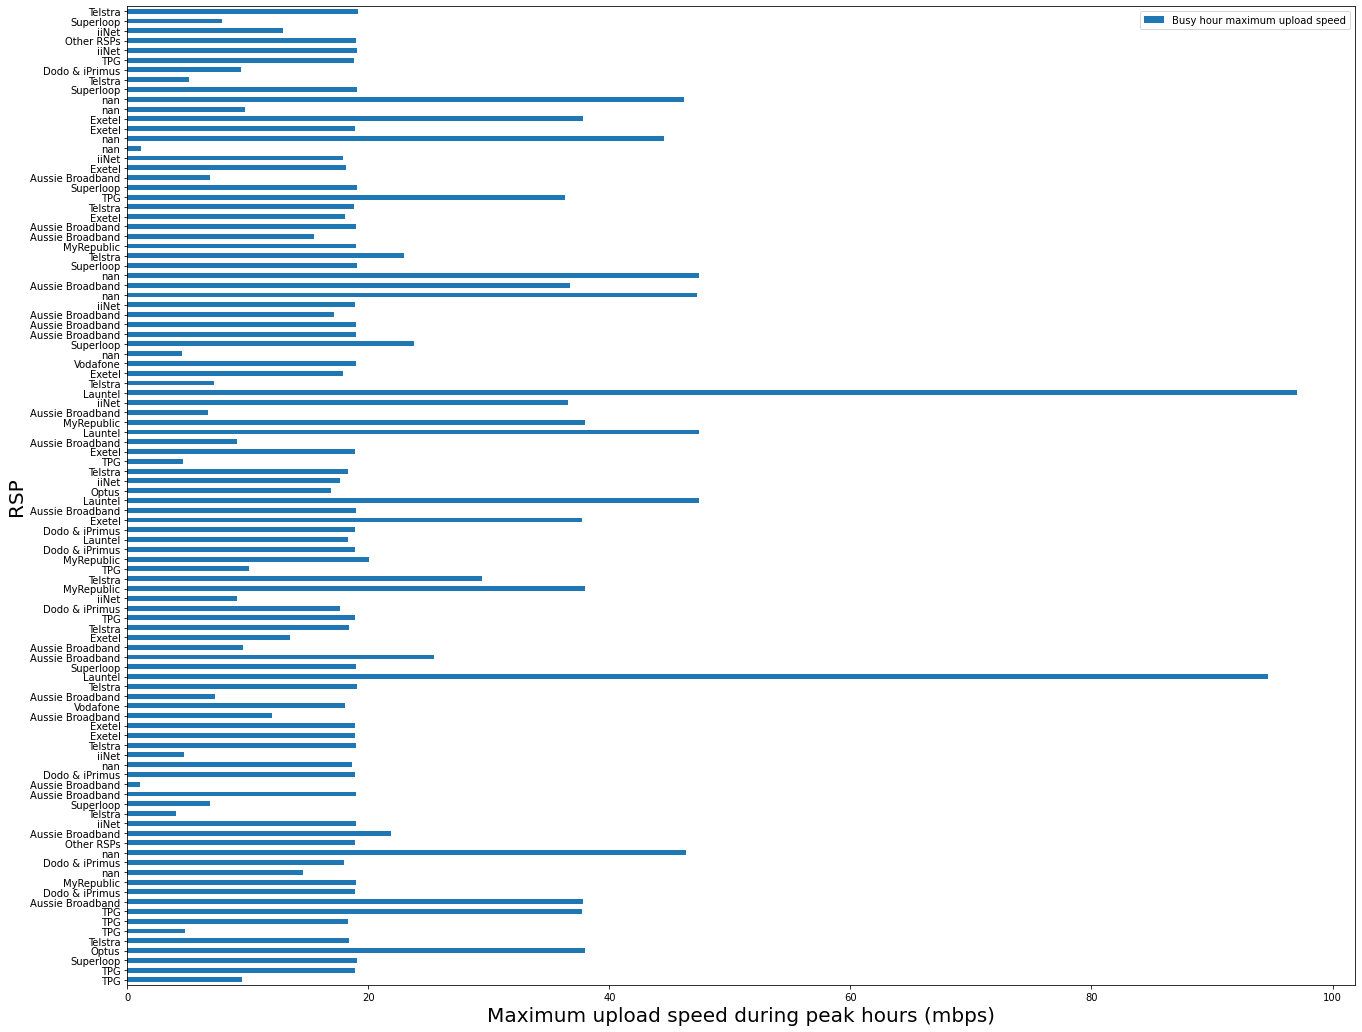

In [161]:
df = pd.DataFrame(internet_data.head(100), columns= ["rsp", "Busy hour maximum upload speed"])
df.plot(x="rsp", y=["Busy hour maximum upload speed"], kind="barh", figsize=(22,18))
plt.xlabel("Maximum upload speed during peak hours (mbps)", fontsize=20)
plt.ylabel("RSP", fontsize=20)
matplotlib.pyplot.show()

In [9]:
internet_data.groupby("rsp").mean()

,unit_id,is_this_service_impaired,is_this_service_underperforming,All hour trimmed mean download speed,All hour minimum download speed,All hour maximum download speed,Busy hour trimmed mean download speed,Busy hour minimum download speed,Busy hour maximum download speed,All hour trimmed mean upload speed,...,Busy hour trimmed mean upload speed,Busy hour minimum upload speed,Busy hour maximum upload speed,All hour trimmed mean latency,All hour minimum latency,All hour maximum latency,Busy hour trimmed mean latency,Busy hour minimum latency,Busy hour maximum latency,Average daily outages
rsp,,,,,,,,,,,,,,,,,,,,,
Aussie Broadband,1.918540e+07,0.168367,0.076531,78.970561,45.260867,82.505000,77.746276,54.407398,81.966735,19.314694,...,19.201224,17.187857,19.679439,9.257959,8.344235,28.297143,9.981582,8.576684,20.993827,0.292143
Dodo & iPrimus,3.027470e+07,0.125000,0.056818,81.006932,46.530455,84.064205,79.655632,57.463563,83.976322,17.423750,...,17.331264,15.847011,17.667241,10.205114,9.004318,37.662727,11.734138,9.161839,32.900920,0.459773
Exetel,2.245600e+07,0.056338,0.042254,61.226901,36.808592,62.440282,60.606197,47.179718,62.166620,20.419014,...,20.379155,18.899155,20.631408,8.802958,8.079859,27.430845,9.477606,8.239437,24.318310,0.131408
Launtel,3.999824e+07,0.037736,0.056604,217.081321,105.969434,223.096792,212.107170,127.736604,222.376981,33.716038,...,32.471538,28.912692,33.095000,10.388491,9.878868,17.498302,10.690377,10.106981,14.482453,0.389808
MyRepublic,2.274982e+07,0.160000,0.080000,83.260000,26.481800,87.476400,74.168800,32.844200,84.957200,24.725200,...,24.346600,21.339400,25.129600,23.063800,20.778200,64.317600,27.208600,21.497400,57.893800,0.399796
Optus,1.753442e+07,0.114754,0.057377,77.712951,46.474590,80.237295,76.450820,57.414918,79.837377,22.815492,...,22.653197,21.091721,23.354918,9.870246,8.327459,27.333689,10.482049,8.811557,21.426475,0.295410
Other RSPs,3.056757e+07,0.111111,0.027778,65.767778,31.526944,68.335278,63.723333,41.770556,68.018889,18.123333,...,17.980000,16.805833,18.295556,14.529444,13.147778,31.656667,15.418611,13.595000,26.890000,0.575833
Superloop,3.423729e+07,0.130435,0.057971,91.757826,50.109420,95.002609,89.959275,62.772464,94.705362,22.600725,...,22.260147,20.495735,22.656176,8.474348,7.847681,27.755797,9.196377,8.048841,20.793043,0.335362
TPG,1.819529e+07,0.104575,0.052288,71.361111,44.341176,73.701046,70.126863,53.236405,73.286144,16.664967,...,16.637086,15.580662,16.912053,10.056797,9.181242,19.843595,10.341711,9.476053,14.390132,0.320199


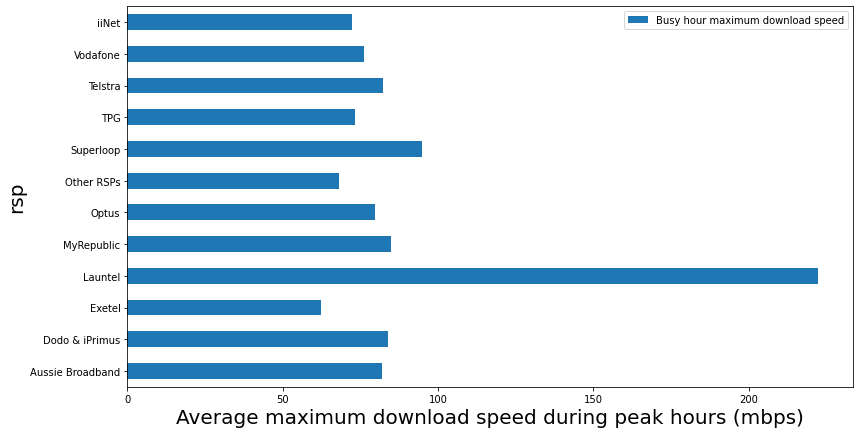

In [18]:
df = pd.DataFrame(internet_data.groupby("rsp").mean(), columns= ["rsp", "Busy hour maximum download speed"])
df.plot(xlabel="rsp", y=["Busy hour maximum download speed"], kind="barh", figsize=(13,7))
plt.xlabel("Average maximum download speed during peak hours (mbps)", fontsize=20)
plt.ylabel("rsp", fontsize=20)
matplotlib.pyplot.show()

In [65]:
internet_data.technology.value_counts()


Fibre to the Node        528
Fibre to the Premises    424
Hybrid Fibre Coaxial     309
Fibre to the Curb        109
Fixed Wireless            73
Name: technology, dtype: int64

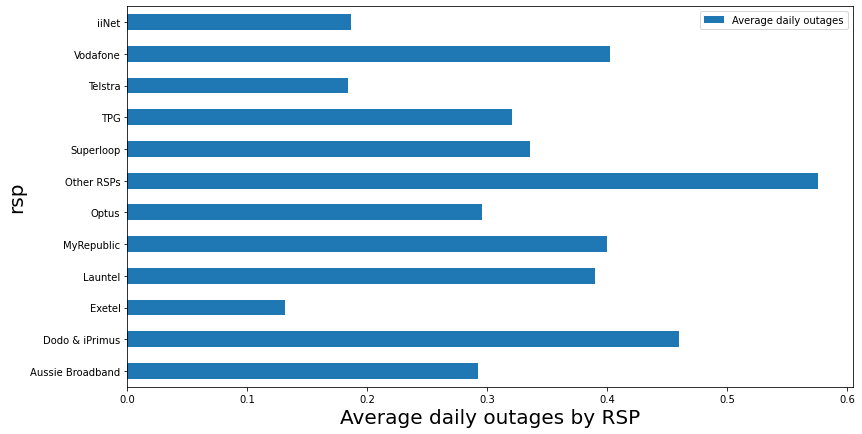

In [19]:
df = pd.DataFrame(internet_data.groupby("rsp").mean(), columns= ["rsp", "Average daily outages"])
df.plot(xlabel="rsp", y=["Average daily outages"], kind="barh", figsize=(13,7))
plt.xlabel("Average daily outages by RSP", fontsize=20)
plt.ylabel("rsp", fontsize=20)
matplotlib.pyplot.show()

In [103]:
internet_data.groupby("technology").mean()

,unit_id,is_this_service_impaired,is_this_service_underperforming,All hour trimmed mean download speed,All hour minimum download speed,All hour maximum download speed,Busy hour trimmed mean download speed,Busy hour minimum download speed,Busy hour maximum download speed,All hour trimmed mean upload speed,...,Busy hour trimmed mean upload speed,Busy hour minimum upload speed,Busy hour maximum upload speed,All hour trimmed mean latency,All hour minimum latency,All hour maximum latency,Busy hour trimmed mean latency,Busy hour minimum latency,Busy hour maximum latency,Average daily outages
technology,,,,,,,,,,,,,,,,,,,,,
Fibre to the Curb,3.045230e+07,0.000000,0.009174,73.134220,43.274128,75.189725,72.204771,53.896514,74.883119,22.371009,...,22.298165,20.668807,22.635780,8.264128,7.436330,25.337064,8.761468,7.510092,19.963486,0.432202
Fibre to the Node,2.004581e+07,0.282197,0.128788,53.281837,29.840587,55.440189,52.380987,36.979469,55.188672,15.993996,...,15.926179,14.688859,16.424259,12.165617,10.817533,30.598027,12.957761,11.003188,24.796755,0.296749
Fibre to the Premises,2.140091e+07,0.000000,0.025943,246.880991,105.046439,262.672736,232.951321,128.200920,259.279929,28.415330,...,28.089572,26.100285,28.515962,7.893066,6.918231,21.262476,8.444646,7.213231,15.970425,0.182204
Fixed Wireless,3.537271e+07,0.000000,0.013699,46.772329,9.450959,63.275616,35.332603,11.988493,55.853014,5.915753,...,4.531507,2.409452,6.564110,40.900274,36.390959,65.041918,42.214932,37.809315,57.528219,0.269452
Hybrid Fibre Coaxial,3.227726e+07,0.000000,0.025890,188.142913,85.406634,210.466764,175.154221,108.692045,200.846818,25.683754,...,25.547720,22.460033,26.172769,10.631262,9.527282,24.851327,11.308502,9.921531,19.887655,0.373029


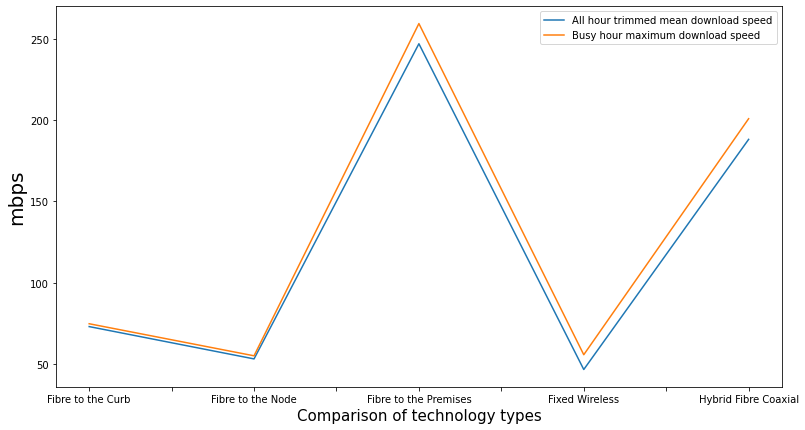

In [31]:
df = pd.DataFrame(internet_data.groupby("technology").mean(), columns= ["rsp", "All hour trimmed mean download speed", "Busy hour maximum download speed"])
df.plot(y=["All hour trimmed mean download speed", "Busy hour maximum download speed"], figsize=(13,7))
plt.xlabel("Comparison of technology types", fontsize=15)
plt.ylabel("mbps", fontsize=20)
matplotlib.pyplot.show()

In [26]:
internet_data.groupby("geography").mean()

,unit_id,is_this_service_impaired,is_this_service_underperforming,All hour trimmed mean download speed,All hour minimum download speed,All hour maximum download speed,Busy hour trimmed mean download speed,Busy hour minimum download speed,Busy hour maximum download speed,All hour trimmed mean upload speed,...,Busy hour trimmed mean upload speed,Busy hour minimum upload speed,Busy hour maximum upload speed,All hour trimmed mean latency,All hour minimum latency,All hour maximum latency,Busy hour trimmed mean latency,Busy hour minimum latency,Busy hour maximum latency,Average daily outages
geography,,,,,,,,,,,,,,,,,,,,,
Major Rural,1.694311e+07,0.240964,0.072289,83.448072,34.559759,86.710241,80.495732,41.085976,86.842683,16.241807,...,16.149146,15.099268,16.495976,12.431084,11.404699,23.868313,12.842892,11.496265,19.789277,0.440843
Minor Rural,2.149454e+07,0.090909,0.036364,93.288909,42.928909,103.209273,88.060545,52.587636,101.764182,15.938364,...,15.633333,13.593333,16.387593,18.375636,16.553636,29.973818,18.909455,16.891273,26.222000,0.235273
Remote,3.511069e+07,0.033333,0.033333,46.696000,10.375167,62.108500,35.836833,13.313500,54.935000,6.543000,...,5.196000,3.077333,7.124500,39.492000,35.151167,65.372000,40.982167,36.679833,57.914667,0.249833
Urban,2.366761e+07,0.101245,0.065560,152.221469,69.707187,163.946448,143.883472,86.555100,160.133355,22.910896,...,22.716975,20.776075,23.214392,10.219659,9.050706,26.677284,10.913087,9.313727,21.021023,0.281410


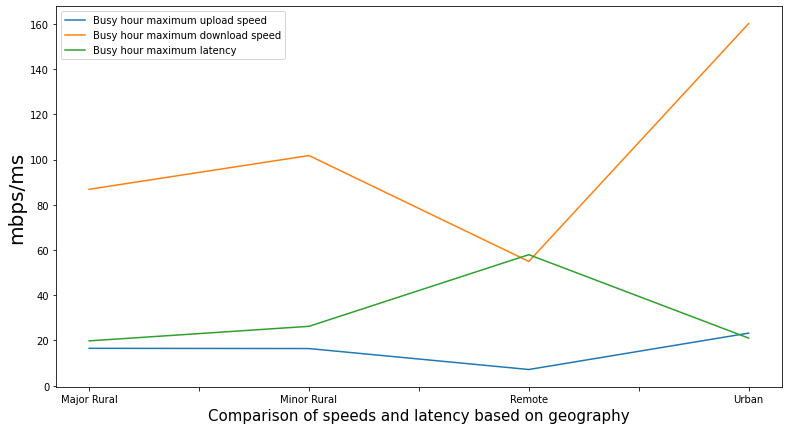

In [32]:
df = pd.DataFrame(internet_data.groupby("geography").mean(), columns= ["Busy hour maximum upload speed", "Busy hour maximum download speed", "Busy hour maximum latency"])
df.plot(y=["Busy hour maximum upload speed", "Busy hour maximum download speed","Busy hour maximum latency" ], figsize=(13,7))
plt.xlabel("Comparison of speeds and latency based on geography", fontsize=15)
plt.ylabel("mbps/ms", fontsize=20)
matplotlib.pyplot.show()

In [34]:
internet_data.groupby("state_or_territory").mean()

,unit_id,is_this_service_impaired,is_this_service_underperforming,All hour trimmed mean download speed,All hour minimum download speed,All hour maximum download speed,Busy hour trimmed mean download speed,Busy hour minimum download speed,Busy hour maximum download speed,All hour trimmed mean upload speed,...,Busy hour trimmed mean upload speed,Busy hour minimum upload speed,Busy hour maximum upload speed,All hour trimmed mean latency,All hour minimum latency,All hour maximum latency,Busy hour trimmed mean latency,Busy hour minimum latency,Busy hour maximum latency,Average daily outages
state_or_territory,,,,,,,,,,,,,,,,,,,,,
ACT,2.689997e+07,0.112676,0.070423,126.201549,66.100141,132.414930,120.602535,73.400282,131.136761,21.344930,...,21.227465,19.342958,21.777887,9.576338,8.578310,34.623239,10.410704,8.892394,24.054789,0.242817
NSW,2.273022e+07,0.085714,0.059341,134.577143,64.871077,144.045626,128.737174,78.984923,141.136932,22.540791,...,22.379978,20.432936,22.956137,10.163604,9.034418,28.787934,11.098282,9.264736,25.100154,0.307099
NT + SA,2.285431e+07,0.069767,0.011628,130.763837,51.919186,137.833721,123.057093,68.593140,135.503721,19.599651,...,19.448488,17.562209,20.005233,24.196628,21.788953,49.524186,25.074651,22.590116,35.111047,0.317907
QLD,2.746689e+07,0.136364,0.066116,159.790455,74.112107,172.367107,150.274132,94.311157,169.066983,22.180041,...,21.530251,19.535146,22.112845,11.514050,10.240702,25.279298,12.235661,10.671157,20.249463,0.323527
TAS,2.211903e+07,0.054795,0.082192,183.838767,69.775890,200.733014,171.555068,85.259178,197.843425,21.370000,...,21.194384,19.253288,21.752192,18.408493,17.151507,25.053836,18.686438,17.359726,23.325205,0.182817
VIC,2.425272e+07,0.095718,0.060453,131.822443,62.416851,144.618942,124.220982,77.368312,139.789647,21.204912,...,21.014066,19.050783,21.580101,10.144520,9.063662,22.853838,10.655833,9.358636,17.910253,0.282759
WA,2.878762e+07,0.176471,0.084034,138.410840,47.144622,150.577311,126.924538,62.347563,145.942353,20.978571,...,20.974492,19.324237,21.538051,11.737731,9.513529,29.553193,12.191695,9.709153,21.203051,0.231610


[]

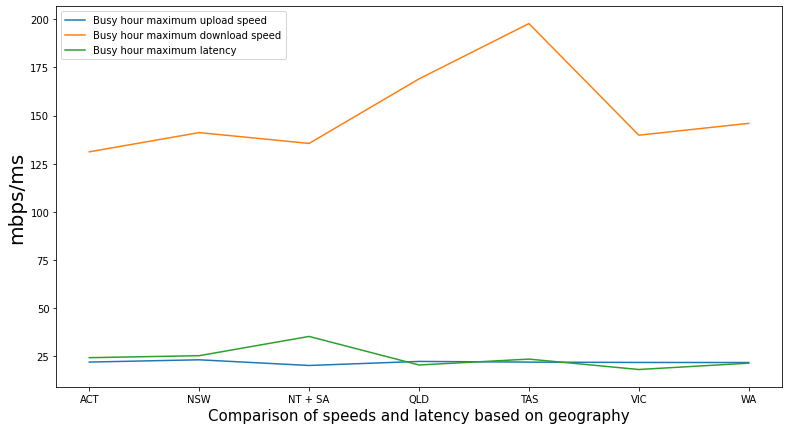

In [43]:
df = pd.DataFrame(internet_data.groupby("state_or_territory").mean(), columns= ["Busy hour maximum upload speed", "Busy hour maximum download speed", "Busy hour maximum latency"])
df.plot(y=["Busy hour maximum upload speed", "Busy hour maximum download speed","Busy hour maximum latency" ], figsize=(13,7))
plt.xlabel("Comparison of speeds and latency based on geography", fontsize=15)
plt.ylabel("mbps/ms", fontsize=20)
matplotlib.pyplot.plot()

In [105]:
## why is launtel the fastest

In [106]:
internet_data.rsp.value_counts()

Aussie Broadband    196
Telstra             182
TPG                 153
iiNet               142
Optus               122
Dodo & iPrimus       88
Exetel               71
Superloop            69
Launtel              53
MyRepublic           50
Vodafone             47
Other RSPs           36
Name: rsp, dtype: int64

[]

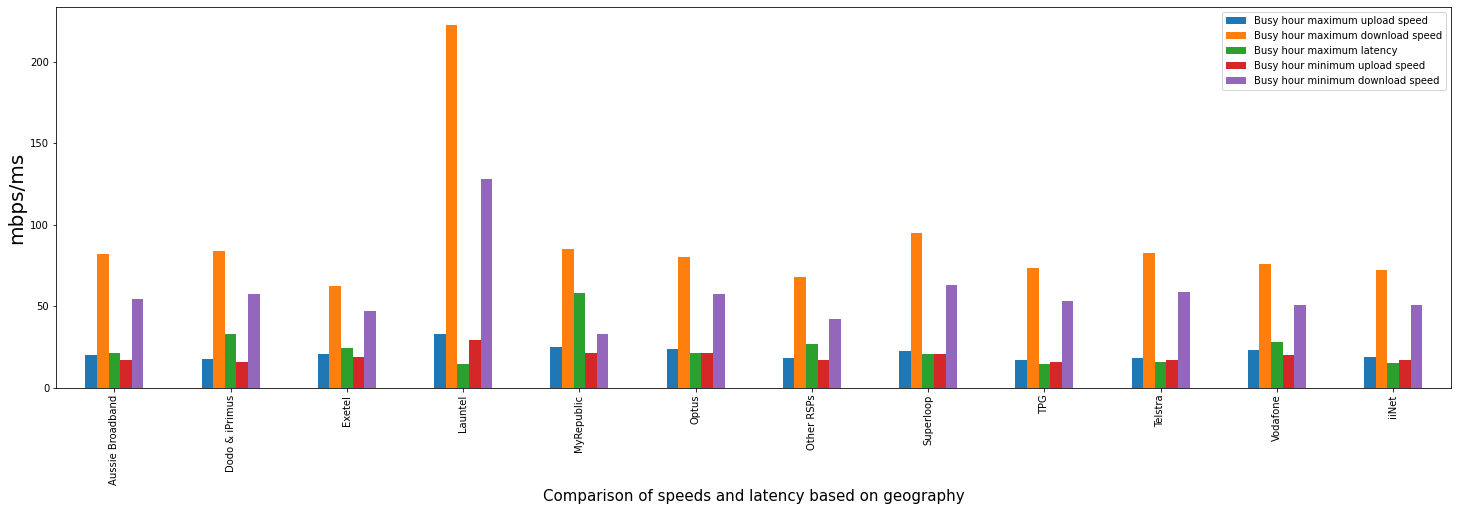

In [133]:
df = pd.DataFrame(internet_data.groupby("rsp").mean(), columns= ["Busy hour maximum upload speed", "Busy hour maximum download speed", "Busy hour maximum latency", "Busy hour minimum download speed", "Busy hour minimum upload speed"])
df.plot(y=["Busy hour maximum upload speed", "Busy hour maximum download speed","Busy hour maximum latency", "Busy hour minimum upload speed", "Busy hour minimum download speed"], kind="bar", figsize=(25,7))
plt.xlabel("Comparison of speeds and latency based on geography", fontsize=15)
plt.ylabel("mbps/ms", fontsize=20)
matplotlib.pyplot.plot()




In [13]:
if internet_data.rsp == "Launtel":


SyntaxError: expected ':' (1516289839.py, line 3)